In [6]:
import os
import matplotlib.pyplot as plt
import pandas as pd


In [4]:


# Khai báo file và tên thuật toán tương ứng
files = {
    "../result/results_summary_ga_combine.csv": "ga_combine",
    "../result/results_summary_ga_goc.csv": "ga_local_search",
    "../result/results_summary_rlga.csv": "rlga",
    "../result/results_summary_gasa.csv": "gasa"
}

# Đọc và thêm cột algo
dfs = []
for path, algo_name in files.items():
    df = pd.read_csv(path)
    df["algo"] = algo_name
    dfs.append(df)

# Gộp lại
merged_df = pd.concat(dfs, ignore_index=True)


In [5]:
merged_df

,m,total_distance,fitness,balance_metric,exec_time,memory_current_MB,memory_peak_MB,converged_gen,convergence_speed,algo
0,1,718.22,718.22,0.00,42.406320,1.083302,1.860137,18.0,49.297222,ga_combine
1,2,888.06,444.61,1.16,60.662909,0.845809,1.499802,10.0,40.897000,ga_combine
2,3,1071.30,357.26,0.36,65.675335,1.005437,1.691543,22.0,11.510000,ga_combine
3,1,779.57,779.57,0.00,108.660749,1.175217,1.834546,49.0,16.857143,ga_local_search
4,2,1195.60,598.94,2.28,123.958861,1.002996,1.667389,28.0,8.735357,ga_local_search
5,3,1325.26,446.64,5.65,108.401782,0.904184,1.617356,25.0,5.950000,ga_local_search
6,1,1290.72,1290.72,0.00,3.706986,35.000000,10.240286,NaN,NaN,rlga
7,2,1452.32,727.82,3.32,3.946328,37.000000,3.477027,NaN,NaN,rlga
8,3,1590.13,531.24,3.02,3.806399,26.000000,2.870000,NaN,NaN,rlga
9,1,994.20,994.20,0.00,11.971312,8.000000,81.866250,NaN,NaN,gasa


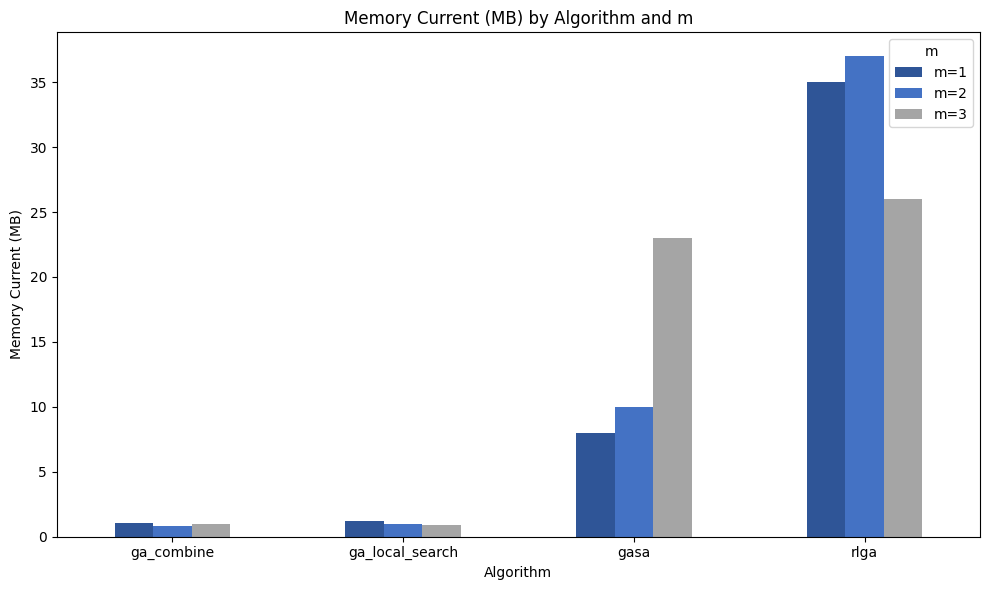

In [12]:

# Chỉ lấy m=1,2,3
filtered_df = merged_df[merged_df["m"].isin([1, 2, 3])]
# Pivot để tiện vẽ
pivot_df = filtered_df.pivot(index="algo", columns="m", values="memory_current_MB")

colors = ["#2F5597", "#4472C4", "#A5A5A5"] # xanh dương, cam, xanh lá
ax = pivot_df.plot(kind="bar", figsize=(10, 6), color=colors)

plt.title("Memory Current (MB) by Algorithm and m")
plt.xlabel("Algorithm")
plt.ylabel("Memory Current (MB)")
plt.legend(title="m", labels=["m=1", "m=2", "m=3"])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


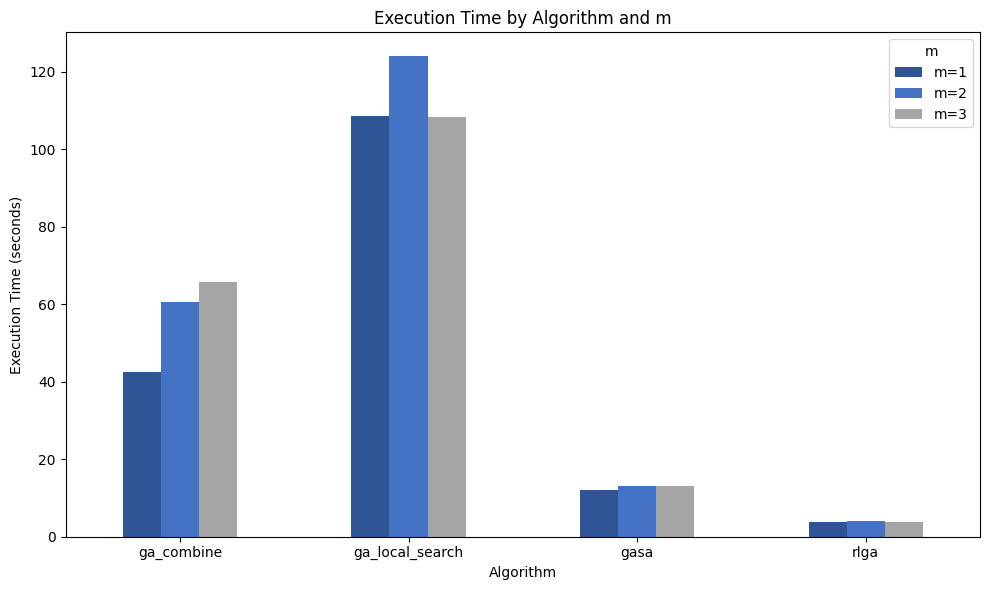

In [13]:
# Chỉ lấy m=1,2,3
filtered_df = merged_df[merged_df["m"].isin([1, 2, 3])]

# Pivot để tiện vẽ (dùng exec_time)
pivot_df_time = filtered_df.pivot(index="algo", columns="m", values="exec_time")

# Dùng cùng bộ màu xanh như trước
colors = ["#2F5597", "#4472C4", "#A5A5A5"]

ax = pivot_df_time.plot(kind="bar", figsize=(10, 6), color=colors)

plt.title("Execution Time by Algorithm and m")
plt.xlabel("Algorithm")
plt.ylabel("Execution Time (seconds)")
plt.legend(title="m", labels=["m=1", "m=2", "m=3"])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [19]:
files_fitness = {
    "../result/ga_combine_fitness_m2.csv": "GA_Combine",
    "../result/ga_goc_fitness_m2.csv": "GA_LocalSearch",
    "../result/gasa_fitness_m2.csv": "GASA",
    "../result/rlga_fitness_m2.csv": "RLGA"
}

plt.figure(figsize=(10,6))

# Đọc và vẽ từng file

dfs_fitness = []
for path, algo_name in files_fitness.items():
    df = pd.read_csv(path)
    df["algo"] = algo_name  # thêm cột tên thuật toán
    dfs_fitness.append(df)
dfs_fitness

[     generation  fitness        algo
 0             0   853.58  GA_Combine
 1             1   833.54  GA_Combine
 2             2   831.37  GA_Combine
 3             3   797.71  GA_Combine
 4             4   797.71  GA_Combine
 ..          ...      ...         ...
 295         295   445.79  GA_Combine
 296         296   445.79  GA_Combine
 297         297   444.61  GA_Combine
 298         298   444.61  GA_Combine
 299         299   444.61  GA_Combine
 
 [300 rows x 3 columns],
      generation  fitness            algo
 0             0   843.53  GA_LocalSearch
 1             1   812.29  GA_LocalSearch
 2             2   812.29  GA_LocalSearch
 3             3   805.86  GA_LocalSearch
 4             4   805.64  GA_LocalSearch
 ..          ...      ...             ...
 295         295   598.94  GA_LocalSearch
 296         296   598.94  GA_LocalSearch
 297         297   598.94  GA_LocalSearch
 298         298   598.94  GA_LocalSearch
 299         299   598.94  GA_LocalSearch
 
 [300 rows 

<Figure size 1000x600 with 0 Axes>

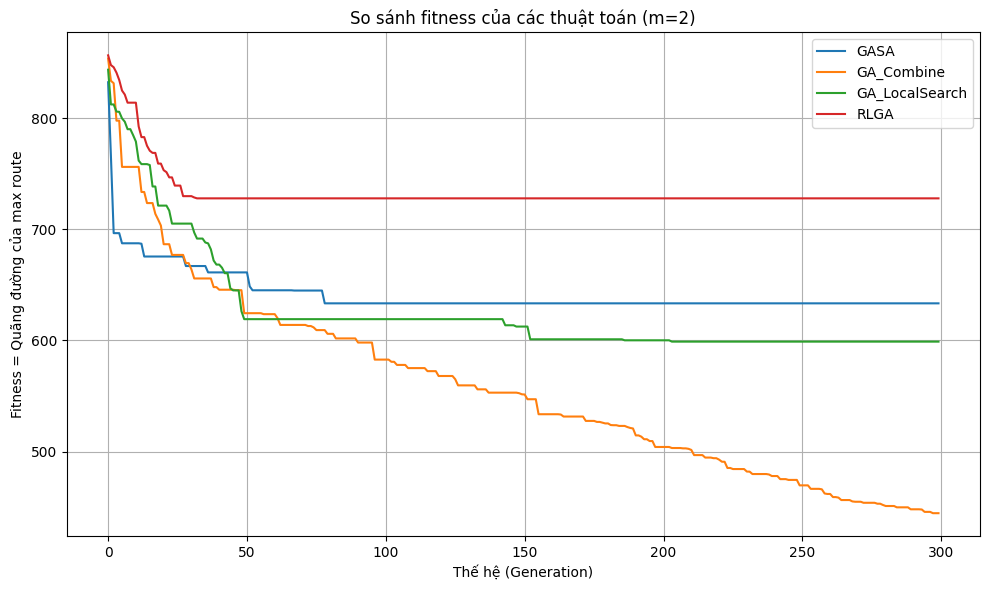

In [20]:

# Gộp tất cả
all_df = pd.concat(dfs_fitness, ignore_index=True)

# Vẽ
plt.figure(figsize=(10,6))
for algo_name, group in all_df.groupby("algo"):
    plt.plot(group["generation"], group["fitness"], label=algo_name)

plt.xlabel("Thế hệ (Generation)")
plt.ylabel("Fitness = Quãng đường của max route")
plt.title("So sánh fitness của các thuật toán (m=2)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
files_fitness3 = {
    "../result/ga_combine_fitness_m3.csv": "GA_Combine",
    "../result/ga_goc_fitness_m3.csv": "GA_LocalSearch",
    "../result/gasa_fitness_m3.csv": "GASA",
    "../result/rlga_fitness_m3.csv": "RLGA"
}

plt.figure(figsize=(10,6))

# Đọc và vẽ từng file

dfs_fitness3 = []
for path, algo_name in files_fitness3.items():
    df = pd.read_csv(path)
    df["algo"] = algo_name  # thêm cột tên thuật toán
    dfs_fitness3.append(df)
dfs_fitness3

[     generation  fitness        algo
 0             0   610.48  GA_Combine
 1             1   610.48  GA_Combine
 2             2   586.04  GA_Combine
 3             3   582.93  GA_Combine
 4             4   582.93  GA_Combine
 ..          ...      ...         ...
 295         295   357.37  GA_Combine
 296         296   357.37  GA_Combine
 297         297   357.37  GA_Combine
 298         298   357.37  GA_Combine
 299         299   357.26  GA_Combine
 
 [300 rows x 3 columns],
      generation  fitness            algo
 0             0   595.39  GA_LocalSearch
 1             1   583.57  GA_LocalSearch
 2             2   570.83  GA_LocalSearch
 3             3   570.31  GA_LocalSearch
 4             4   568.67  GA_LocalSearch
 ..          ...      ...             ...
 295         295   446.64  GA_LocalSearch
 296         296   446.64  GA_LocalSearch
 297         297   446.64  GA_LocalSearch
 298         298   446.64  GA_LocalSearch
 299         299   446.64  GA_LocalSearch
 
 [300 rows 

<Figure size 1000x600 with 0 Axes>

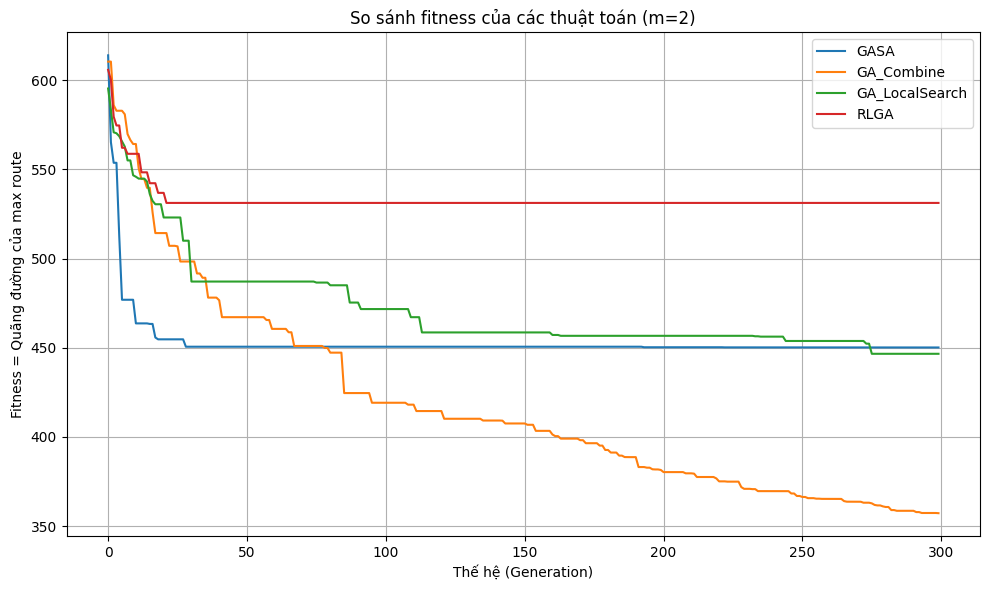

In [23]:

# Gộp tất cả
all_df3 = pd.concat(dfs_fitness3, ignore_index=True)

# Vẽ
plt.figure(figsize=(10,6))
for algo_name, group in all_df3.groupby("algo"):
    plt.plot(group["generation"], group["fitness"], label=algo_name)

plt.xlabel("Thế hệ (Generation)")
plt.ylabel("Fitness = Quãng đường của max route")
plt.title("So sánh fitness của các thuật toán (m=2)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()